In [1]:
import pandas as pd
import seaborn as sns
from datetime import date

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/LV/Desktop/cleaned_bol_data.csv')

/Users/LV/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (6,7,12,13,15,19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [12]:
df.head()

,orderDate,productId,sellerId,totalPrice,quantityOrdered,countryCode,cancellationDate,cancellationReasonCode,promisedDeliveryDate,shipmentDate,...,currentCountryAvailabilitySeller,calculationDefinitive,noCancellation,onTimeDelivery,noCase,hasOneCase,hasMoreCases,noReturn,generalMatchClassification,detailedMatchClassification
0,2019-05-23,9200000110554495,56396,14.95,1,NL,NaT,NaN,2019-05-27,2019-05-24,...,NL,True,True,True,True,False,False,True,KNOWN HAPPY,KNOWN HAPPY
1,2019-11-14,9200000104288662,1185592,499.00,1,NL,NaT,NaN,2019-11-15,2019-11-14,...,NL,True,True,True,True,False,False,True,KNOWN HAPPY,KNOWN HAPPY
2,2019-05-14,9200000100410620,1347885,29.95,1,BE,NaT,NaN,2019-05-15,2019-05-15,...,ALL,True,True,True,True,False,False,True,KNOWN HAPPY,KNOWN HAPPY
3,2019-05-30,9200000085468352,1102299,139.90,1,NL,NaT,NaN,2019-06-01,2019-05-31,...,ALL,True,True,True,True,False,False,True,KNOWN HAPPY,KNOWN HAPPY
4,2019-07-28,9200000107587035,1400779,39.95,1,NL,NaT,NaN,2019-07-29,2019-07-28,...,NL,True,True,True,True,False,False,True,KNOWN HAPPY,KNOWN HAPPY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4773889 entries, 0 to 4773888
Data columns (total 38 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   orderDate                         object 
 1   productId                         int64  
 2   sellerId                          int64  
 3   totalPrice                        float64
 4   quantityOrdered                   int64  
 5   countryCode                       object 
 6   cancellationDate                  object 
 7   cancellationReasonCode            object 
 8   promisedDeliveryDate              object 
 9   shipmentDate                      object 
 10  transporterCode                   object 
 11  transporterName                   object 
 12  transporterNameOther              object 
 13  datetTimeFirstDeliveryMoment      object 
 14  fulfilmentType                    object 
 15  startDateCase                     object 
 16  cntDistinctCaseIds                fl

In [9]:
#Change type of columns
dtype = {'calculationDefinitive': bool,
         'noCancellation': bool,
         'onTimeDelivery': bool,
         'noCase': bool,
         'hasOneCase': bool,
         'hasMoreCases': bool,
         'noReturn': bool}

df = df.astype(dtype)

#Transform dates to date-type
df['orderDate'] = pd.to_datetime(df['orderDate'])
df['cancellationDate'] = pd.to_datetime(df['cancellationDate'])
df['promisedDeliveryDate'] = pd.to_datetime(df['promisedDeliveryDate'])
df['shipmentDate'] = pd.to_datetime(df['shipmentDate'])
df['datetTimeFirstDeliveryMoment'] = pd.to_datetime(df['datetTimeFirstDeliveryMoment'])
df['startDateCase'] = pd.to_datetime(df['startDateCase'])
df['returnDateTime'] = pd.to_datetime(df['returnDateTime'])
df['registrationDateSeller'] = pd.to_datetime(df['registrationDateSeller'])

df.dtypes

orderDate                           datetime64[ns]
productId                                    int64
sellerId                                     int64
totalPrice                                 float64
quantityOrdered                              int64
countryCode                                 object
cancellationDate                    datetime64[ns]
cancellationReasonCode                      object
promisedDeliveryDate                datetime64[ns]
shipmentDate                        datetime64[ns]
transporterCode                             object
transporterName                             object
transporterNameOther                        object
datetTimeFirstDeliveryMoment        datetime64[ns]
fulfilmentType                              object
startDateCase                       datetime64[ns]
cntDistinctCaseIds                         float64
returnDateTime                      datetime64[ns]
quanityReturned                            float64
returnCode                     

In [134]:
#Create new variables related to periods (days difference)
df['casePeriod'] = (df['startDateCase'] - df['orderDate']).dt.days
df['returnPeriod'] = (df['returnDateTime'] - df['orderDate']).dt.days
df['cancelPeriod'] = (df['cancellationDate'] - df['orderDate']).dt.days
df['promisedDeliveryPeriod'] = (df['promisedDeliveryDate'] - df['orderDate']).dt.days
df['deliveryPeriod'] = (df['datetTimeFirstDeliveryMoment'].dt.normalize() - df['orderDate']).dt.days

#Create new time related columns
df['year'] = df['orderDate'].dt.year
df['month'] = df['orderDate'].dt.month
df['weekday'] = df['orderDate'].dt.weekday

In [135]:
df.describe(include = 'all', datetime_is_numeric = True)

,orderDate,productId,sellerId,totalPrice,quantityOrdered,countryCode,cancellationDate,cancellationReasonCode,promisedDeliveryDate,shipmentDate,...,promisedDeliveryPeriod,deliveryPeriod,casePeriod_2,returnPeriod_2,cancelPeriod_2,deliveryPeriod_2,year,month,weekday,detailedMatchClassification_
count,4773889,4.773889e+06,4.773889e+06,4.773889e+06,4.773889e+06,4773889,77862,77862,4772950,4696047,...,4.772950e+06,3.068341e+06,53120.000000,77777.000000,62866.000000,2.388004e+06,4.773889e+06,4.773889e+06,4.773889e+06,4.773889e+06
unique,NaN,NaN,NaN,NaN,NaN,2,NaN,25,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NL,NaN,CUST_FE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,3554802,NaN,51025,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2020-02-19 20:40:58.096760576,8.893234e+15,1.079660e+06,3.317443e+01,1.110490e+00,NaN,2020-02-21 03:24:09.487611648,NaN,2020-02-22 12:28:54.060680960,2020-02-20 14:13:23.186797824,...,2.645849e+00,1.979147e+00,1.230403,1.535004,0.509385,1.421314e+00,2.019596e+03,7.011754e+00,2.817510e+00,7.555255e-01
min,2019-01-01 00:00:00,6.667439e+08,2.821000e+03,6.900000e-01,1.000000e+00,NaN,2019-01-01 00:00:00,NaN,2019-01-02 00:00:00,2019-01-01 00:00:00,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,2.019000e+03,1.000000e+00,0.000000e+00,0.000000e+00
25%,2019-09-13 00:00:00,9.200000e+15,8.299310e+05,1.295000e+01,1.000000e+00,NaN,2019-09-26 00:00:00,NaN,2019-09-17 00:00:00,2019-09-14 00:00:00,...,1.000000e+00,1.000000e+00,1.000000,1.000000,0.000000,1.000000e+00,2.019000e+03,4.000000e+00,1.000000e+00,0.000000e+00
50%,2020-03-18 00:00:00,9.200000e+15,1.121998e+06,1.900000e+01,1.000000e+00,NaN,2020-03-23 00:00:00,NaN,2020-03-20 00:00:00,2020-03-19 00:00:00,...,2.000000e+00,2.000000e+00,1.000000,2.000000,0.000000,1.000000e+00,2.020000e+03,7.000000e+00,3.000000e+00,0.000000e+00
75%,2020-08-14 00:00:00,9.200000e+15,1.279589e+06,3.145000e+01,1.000000e+00,NaN,2020-08-01 00:00:00,NaN,2020-08-18 00:00:00,2020-08-16 00:00:00,...,3.000000e+00,2.000000e+00,2.000000,2.000000,1.000000,2.000000e+00,2.020000e+03,1.000000e+01,5.000000e+00,2.000000e+00
max,2020-12-16 00:00:00,9.300000e+15,1.653288e+06,1.063720e+04,3.000000e+02,NaN,2021-01-11 00:00:00,NaN,2021-01-06 00:00:00,2021-01-09 00:00:00,...,4.900000e+01,1.990000e+02,2.000000,2.000000,2.000000,2.000000e+00,2.020000e+03,1.200000e+01,6.000000e+00,2.000000e+00


#### Create determinant availability plot

In [26]:
#Calculate totals per Match Determinant
totalCase = df['casePeriod'].count()
totalReturn = df['returnPeriod'].count()
totalCancel = df['cancelPeriod'].count()
totalPromisedDelivery = df['promisedDeliveryPeriod'].count()
totalDelivery = df['deliveryPeriod'].count()

In [136]:
#Create table for plot
periodTable = pd.concat([df['casePeriod'].value_counts().sort_index(),
                         df['returnPeriod'].value_counts().sort_index(),
                         df['cancelPeriod'].value_counts().sort_index(),
                         df['promisedDeliveryPeriod'].value_counts().sort_index(),
                         df['deliveryPeriod'].value_counts().sort_index()],axis=1)

In [137]:
#Create percantages per day and calculate running sum
periodTable['casePeriod%'] = (periodTable['casePeriod'] / totalCase).cumsum()
periodTable['returnPeriod%'] = (periodTable['returnPeriod'] / totalReturn).cumsum()
periodTable['cancelPeriod%'] = (periodTable['cancelPeriod'] / totalCancel).cumsum()
periodTable['promisedDeliveryPeriod%'] = (periodTable['promisedDeliveryPeriod'] / totalPromisedDelivery).cumsum()
periodTable['deliveryPeriod%'] = (periodTable['deliveryPeriod'] / df.shape[0]).cumsum()

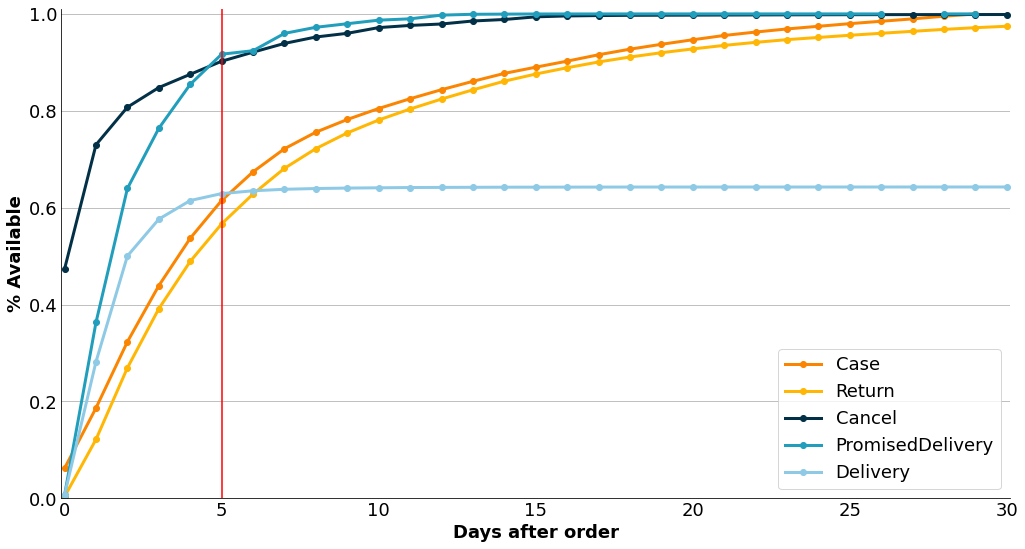

In [138]:
### Plot parameters
plt.rcParams.update({'font.size': 18})

# Turn interactive plotting off
plt.ioff()

# Color palettes
color1 = ['#364958','#3b6064','#55828b','#87bba2','#c9e4ca']
color2 = ['#051923','#003554','#006494','#0582ca','#00a6fb']
color3 = ['#fb8500','#ffb703','#023047','#219ebc','#8ecae6']
COLOR = color3

### Plotten
plt.figure(figsize = (17,9))

plt.plot(periodTable['casePeriod%'], color=COLOR[0], marker = 'o', linewidth=3)
plt.plot(periodTable['returnPeriod%'], color=COLOR[1], marker = 'o', linewidth=3)
plt.plot(periodTable['cancelPeriod%'], color=COLOR[2], marker = 'o', linewidth=3)
plt.plot(periodTable['promisedDeliveryPeriod%'], color=COLOR[3], marker = 'o', linewidth=3)
plt.plot(periodTable['deliveryPeriod%'], color=COLOR[4], marker = 'o', linewidth=3)

### Titel
plt.title('', fontweight = 'bold')

### Assen
plt.ylabel('% Available', fontweight = 'bold')
plt.ylim(0,1.01)

plt.xlabel('Days after order', fontweight = 'bold')
plt.xlim(-0.1, 30.1)
#plt.xticks(x,('tick_1', 'tick_2', 'tick_3', 'tick_4'))

plt.axvline(x=5, color='red')

### Grafiek Lay-out
plt.grid(color='#C0C0C0', linestyle='-', linewidth=1, axis = 'y')
plt.legend(('Case', 'Return', 'Cancel', 'PromisedDelivery', 'Delivery'),loc='lower right')
plt.tick_params(direction='out', length=0, colors='black')
sns.despine(left=False, bottom=False, right=True)

plt.show()

#### Create dynamic columns

In [94]:
def createColumns(df,X):
    """
    Function to create dynamic columns based on the prediction period.
    X = number of days after order date
    """
    
    dynamic_cols = ['casePeriod','returnPeriod','cancelPeriod','deliveryPeriod']
    
    for col in dynamic_cols:
        
        dynamic_colname = col+'_'+str(X)
        df[dynamic_colname] = df[col].dt.days
        df[dynamic_colname] = df[dynamic_colname].apply(lambda x: x if x <= X else None)
        
    return df

#### Handling categorical variables

In [108]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [106]:
#Categorical variables
s = (df.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['countryCode', 'cancellationReasonCode', 'transporterCode', 'transporterName', 'transporterNameOther', 'fulfilmentType', 'returnCode', 'productTitle', 'brickName', 'chunkName', 'productGroup', 'productSubGroup', 'productSubSubGroup', 'countryOriginSeller', 'currentCountryAvailabilitySeller', 'generalMatchClassification', 'detailedMatchClassification']


In [126]:
#Option 1: LabelEncoder
#give each category a numerical value - cannot handle nulls - usefull for normalization
le = LabelEncoder()
le.fit(df['detailedMatchClassification'])
df['detailedMatchClassification_'] = le.transform(df['detailedMatchClassification'])

In [ ]:
#Option 2: One-Hot-Encoder
#create a boolean column for each separate category - not usefull high cardinality 
ohe = OneHotEncoder(handle_unknown = 'ignore')
enc.fit()
enc.transform()

#### Models
Sklearn multi-class / multi-label: https://scikit-learn.org/stable/modules/multiclass.html

In [172]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

clf = DecisionTreeClassifier(random_state=0,
                             class_weight='balanced')

X = ['totalPrice','quantityOrdered','promisedDeliveryPeriod','weekday','month','year']
y = ['detailedMatchClassification']

df_test = df[X+y].dropna()

clf = clf.fit(df_test[X],df_test[y])

prediction = clf.predict(df_test[X])

print("Accuracy:",metrics.accuracy_score(df_test[y], prediction))

Accuracy: 0.6897252223467667


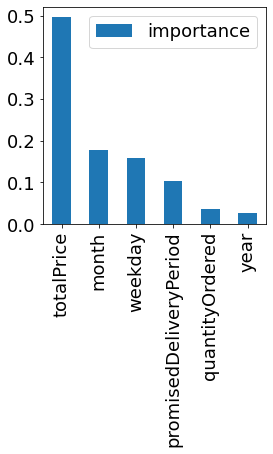

In [173]:
importanceDF = pd.DataFrame(clf.feature_importances_,index=X,columns=['importance']).sort_values('importance',ascending=False)
importanceDF.plot.bar(figsize=(4,4))
plt.show()